In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import random
import seaborn as sns
sns.set()

Using TensorFlow backend.


In [2]:
#     1. CRIM      per capita crime rate by town
#     2. ZN        proportion of residential land zoned for lots over 
#                  25,000 sq.ft.
#     3. INDUS     proportion of non-retail business acres per town
#     4. CHAS      Charles River dummy variable (= 1 if tract bounds 
#                  river; 0 otherwise)
#     5. NOX       nitric oxides concentration (parts per 10 million)
#     6. RM        average number of rooms per dwelling
#     7. AGE       proportion of owner-occupied units built prior to 1940
#     8. DIS       weighted distances to five Boston employment centres
#     9. RAD       index of accessibility to radial highways
#     10. TAX      full-value property-tax rate per $10,000
#     11. PTRATIO  pupil-teacher ratio by town
#     12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
#                  by town
#     13. LSTAT    % lower status of the population
#     14. MEDV     Median value of owner-occupied homes in $1000's
df = pd.read_csv('housing-data.csv')

df = df.sample(frac=1).reset_index(drop=True)

df = df.dropna(subset=['MEDV'])
df = df.fillna(df.mean())

#df = df[df['MEDV'] != 50]

def min_max_normalize(series):
    return (series - series.min()) / (series.max()-series.min())

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.612870,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601539,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.612870,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


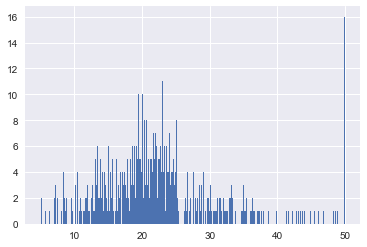

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
10,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45,50.0
31,4.89822,0.0,18.10,0,0.6310,4.970,100.0,1.3325,24,666.0,20.2,375.52,3.26,50.0
234,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
264,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0
285,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0
290,5.66998,0.0,18.10,1,0.6310,6.683,96.8,1.3567,24,666.0,20.2,375.33,3.73,50.0
352,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0
353,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0
367,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403.0,14.7,374.43,1.73,50.0
388,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264.0,13.0,384.54,7.44,50.0


In [10]:
df['MEDV'].hist(bins=300)
plt.show()

df[df['MEDV'] == 50]

In [4]:
input = min_max_normalize(df.iloc[:, :13]).as_matrix()
target = df.iloc[:, 13:].as_matrix()

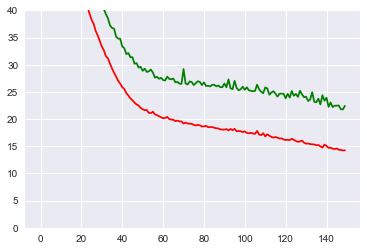

In [5]:
model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

training_data = model.fit(input, target, validation_split=0.3, epochs=150, batch_size=10, verbose=False)

plt.plot(training_data.history['val_loss'], 'g', training_data.history['loss'], 'r')
plt.ylim(0, 40)
plt.show()